In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import plotly as py
import cufflinks as cf

In [3]:
from plotly.offline import iplot


In [4]:
py.offline.init_notebook_mode(connected = True)
cf.go_offline()

In [5]:
df = pd.read_csv('matches.csv', index_col = 'id', parse_dates=['date'])

In [6]:
df.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


# Win and Lost Team Analysis

In [7]:
df.head(1)

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN


In [8]:
df['result'].value_counts()

normal       743
tie            9
no result      4
Name: result, dtype: int64

In [9]:
df[df['result']== 'tie']

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
34,2017,Rajkot,2017-04-29,Gujarat Lions,Mumbai Indians,Gujarat Lions,bat,tie,0,Mumbai Indians,0,0,KH Pandya,Saurashtra Cricket Association Stadium,AK Chaudhary,CB Gaffaney,NaN
126,2009,Cape Town,2009-04-23,Rajasthan Royals,Kolkata Knight Riders,Kolkata Knight Riders,field,tie,0,Rajasthan Royals,0,0,YK Pathan,Newlands,MR Benson,M Erasmus,NaN
190,2010,Chennai,2010-03-21,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,field,tie,0,Kings XI Punjab,0,0,J Theron,"MA Chidambaram Stadium, Chepauk",K Hariharan,DJ Harper,NaN
388,2013,Hyderabad,2013-04-07,Royal Challengers Bangalore,Sunrisers Hyderabad,Royal Challengers Bangalore,bat,tie,0,Sunrisers Hyderabad,0,0,GH Vihari,"Rajiv Gandhi International Stadium, Uppal",AK Chaudhary,S Ravi,NaN
401,2013,Bangalore,2013-04-16,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,tie,0,Royal Challengers Bangalore,0,0,V Kohli,M Chinnaswamy Stadium,M Erasmus,VA Kulkarni,NaN
476,2014,Abu Dhabi,2014-04-29,Rajasthan Royals,Kolkata Knight Riders,Rajasthan Royals,bat,tie,0,Rajasthan Royals,0,0,JP Faulkner,Sheikh Zayed Stadium,Aleem Dar,AK Chaudhary,NaN
536,2015,Ahmedabad,2015-04-21,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,tie,0,Kings XI Punjab,0,0,SE Marsh,"Sardar Patel Stadium, Motera",M Erasmus,S Ravi,NaN
11146,2019,Delhi,2019-03-30,Kolkata Knight Riders,Delhi Capitals,Delhi Capitals,field,tie,0,Delhi Capitals,0,0,P Shaw,Feroz Shah Kotla Ground,Anil Dandekar,Nitin Menon,Marais Erasmus
11342,2019,Mumbai,2019-02-05,Mumbai Indians,Sunrisers Hyderabad,Mumbai Indians,bat,tie,0,Mumbai Indians,0,0,JJ Bumrah,Wankhede Stadium,S Ravi,O Nandan,Nanda Kishore


In [10]:
df[df['result'] == 'no result']

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN
11340,2019,Bengaluru,2019-04-30,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe,Anil Chaudhary


In [11]:
df['winner'].isnull().sum()

4

In [12]:
winslost = df[['team1','team2','winner']]
winslost.head()

,team1,team2,winner
id,,,
1,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad
2,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant
3,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders
4,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab
5,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore


In [13]:
winslost['loser'] = winslost.apply(lambda x: (x['team2'] if x['team1']==x['winner'] else x['team1']), axis = 1)

In [14]:
winslost.head()

,team1,team2,winner,loser
id,,,,
1,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,Royal Challengers Bangalore
2,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,Mumbai Indians
3,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,Gujarat Lions
4,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,Rising Pune Supergiant
5,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,Delhi Daredevils


In [15]:
wins = winslost['winner'].value_counts()
wins

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Delhi Capitals                  10
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

In [16]:
loosers = winslost['loser'].value_counts()
loosers

Royal Challengers Bangalore    95
Kings XI Punjab                94
Delhi Daredevils               94
Kolkata Knight Riders          86
Mumbai Indians                 78
Rajasthan Royals               70
Chennai Super Kings            64
Sunrisers Hyderabad            50
Deccan Chargers                46
Pune Warriors                  33
Gujarat Lions                  17
Rising Pune Supergiants         9
Kochi Tuskers Kerala            8
Delhi Capitals                  6
Rising Pune Supergiant          6
Name: loser, dtype: int64

In [17]:
wins.iplot(kind = 'bar', xTitle = 'Team',yTitle = 'Count', title = 'Winning Count')

# MOM and Citywise Analysis

In [18]:
df.head(1)

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN


In [19]:
mom = df['player_of_match'].value_counts()
mom.head(20)

CH Gayle          21
AB de Villiers    20
DA Warner         17
RG Sharma         17
MS Dhoni          17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
MEK Hussey        12
V Kohli           12
AM Rahane         12
AD Russell        11
V Sehwag          11
A Mishra          11
DR Smith          11
KA Pollard        10
JH Kallis         10
SE Marsh           9
AT Rayudu          9
Name: player_of_match, dtype: int64

In [20]:
mom[:20].iplot(kind = 'bar', xTitle = 'Player', yTitle = 'Count', title = 'Top 20 Most MOM ')

# Matches Hosted in Each City 

In [21]:
city = df['city'].value_counts()

In [22]:
city.head(20)

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Centurion          12
Ahmedabad          12
Mohali             10
Rajkot             10
Dharamsala          9
Indore              9
Johannesburg        8
Port Elizabeth      7
Name: city, dtype: int64

In [23]:
city[:20].iplot(kind = 'bar')

#  Matches hosted at Venue

In [24]:
stadium = df['venue'].value_counts()
stadium[:20].iplot(kind = 'bar')

# MI v/s CSK Head to Head

In [25]:
def get_micsk(team1,team2):
    teams = ['Chennai Super Kings','Mumbai Indians']
    if team1 in teams and team2 in teams:
        return True
    else:
        return False

In [28]:
index = []
for row in df.iterrows():
    flag = get_micsk(row[1]['team1'],row[1]['team2'])
    index.append(flag)

In [29]:
sum(index)

28

In [30]:
micsk = df[index]
micsk.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
67,2008,Chennai,2008-04-23,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Chennai Super Kings,6,0,ML Hayden,"MA Chidambaram Stadium, Chepauk",DJ Harper,GA Pratapkumar,NaN
96,2008,Mumbai,2008-05-14,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,ST Jayasuriya,Wankhede Stadium,BR Doctrove,AM Saheba,NaN
118,2009,Cape Town,2009-04-18,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Mumbai Indians,19,0,SR Tendulkar,Newlands,BR Doctrove,K Hariharan,NaN
162,2009,Port Elizabeth,2009-05-16,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,ML Hayden,St George's Park,SK Tarapore,SJA Taufel,NaN
194,2010,Mumbai,2010-03-25,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,5,SR Tendulkar,Brabourne Stadium,BF Bowden,AM Saheba,NaN


In [31]:
micsk['toss_decision'].value_counts().iplot(kind = 'bar')

In [32]:
micsk['toss_winner'].value_counts().iplot(kind = 'bar')

In [33]:
micsk['player_of_match'].value_counts().iplot(kind = 'bar')

In [34]:
micsk.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
67,2008,Chennai,2008-04-23,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Chennai Super Kings,6,0,ML Hayden,"MA Chidambaram Stadium, Chepauk",DJ Harper,GA Pratapkumar,NaN
96,2008,Mumbai,2008-05-14,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,ST Jayasuriya,Wankhede Stadium,BR Doctrove,AM Saheba,NaN
118,2009,Cape Town,2009-04-18,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Mumbai Indians,19,0,SR Tendulkar,Newlands,BR Doctrove,K Hariharan,NaN
162,2009,Port Elizabeth,2009-05-16,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,ML Hayden,St George's Park,SK Tarapore,SJA Taufel,NaN
194,2010,Mumbai,2010-03-25,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,5,SR Tendulkar,Brabourne Stadium,BF Bowden,AM Saheba,NaN


In [36]:
temp = micsk[['winner','win_by_runs','win_by_wickets']]
temp = temp.set_index('winner')
temp.max()

win_by_runs       60
win_by_wickets     9
dtype: int64

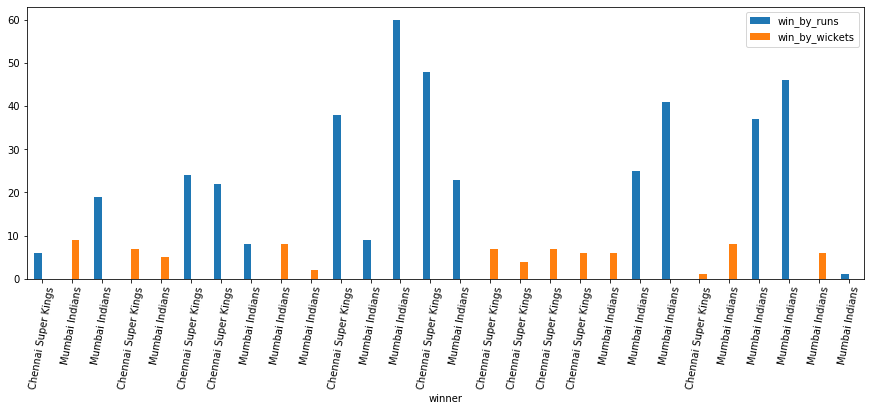

In [37]:
temp.plot.bar(figsize = (15,5), rot=80)

In [45]:
season = df.groupby('season')[['win_by_runs']].max()
season

,win_by_runs
season,
2008,140
2009,92
2010,98
2011,111
2012,86
2013,130
2014,93
2015,138
2016,144


In [46]:
season.iplot(kind = 'bar')

# Ball by ball analysis

In [47]:
df = pd.read_csv('deliveries.csv', index_col = 'match_id')
df

,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
match_id,,,,,,,,,,,,,,,,,,,,
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya


In [49]:
df['batsman'].value_counts().head(20).iplot(kind = 'bar')

In [50]:
df['bowler'].value_counts().head(20).iplot(kind = 'bar')

In [51]:
df['non_striker'].value_counts().head(20).iplot(kind = 'bar')

In [53]:
df.columns

Index(['inning', 'batting_team', 'bowling_team', 'over', 'ball', 'batsman',
       'non_striker', 'bowler', 'is_super_over', 'wide_runs', 'bye_runs',
       'legbye_runs', 'noball_runs', 'penalty_runs', 'batsman_runs',
       'extra_runs', 'total_runs', 'player_dismissed', 'dismissal_kind',
       'fielder'],
      dtype='object')

In [54]:
runs = df.groupby('batting_team').sum()[['batsman_runs','total_runs']]
runs

,batsman_runs,total_runs
batting_team,,
Chennai Super Kings,25104,26418
Deccan Chargers,10885,11463
Delhi Capitals,2530,2630
Delhi Daredevils,23115,24388
Gujarat Lions,4629,4862
Kings XI Punjab,26468,27893
Kochi Tuskers Kerala,1758,1901
Kolkata Knight Riders,25895,27419
Mumbai Indians,28164,29809


In [55]:
runs.iplot(kind = 'bar')

In [60]:
batsman = df.groupby('batsman')['batsman_runs'].sum()
batsman = batsman.sort_values(ascending = False)
batsman.head(20).iplot(kind = 'bar')

In [61]:
df['player_dismissed'].value_counts().head(20).iplot(kind = 'bar')

In [64]:
df['dismissal_kind'].value_counts().iplot(kind = 'bar')